# Normalization and Handling Outliers

## Introduction

In this notebook, we'll explore two crucial preprocessing techniques for linear regression: normalization and handling outliers. These techniques are essential for ensuring that our models perform optimally and are not unduly influenced by the scale of features or extreme values.

## 1. Normalization

Normalization, also known as feature scaling, is the process of transforming numeric variables to a common scale. This is important because linear regression models are sensitive to the scale of input features. Features with larger magnitudes can dominate the model's learning process, even if they're not more important for predicting the target variable.

### 1.1 Why Normalize?

1. **Equal feature importance**: Ensures that all features contribute equally to the model's learning process.
2. **Faster convergence**: For gradient-based optimization methods, normalization can lead to faster convergence.
3. **Improved numerical stability**: Prevents computational issues that can arise from very large or very small numbers.

### 1.2 Common Normalization Techniques

#### 1.2.1 Standard Scaling (Z-score normalization)

Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1. The formula is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $z$ is the normalized value
- $x$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature

Let's implement standard scaling from scratch and compare it with sklearn's implementation:


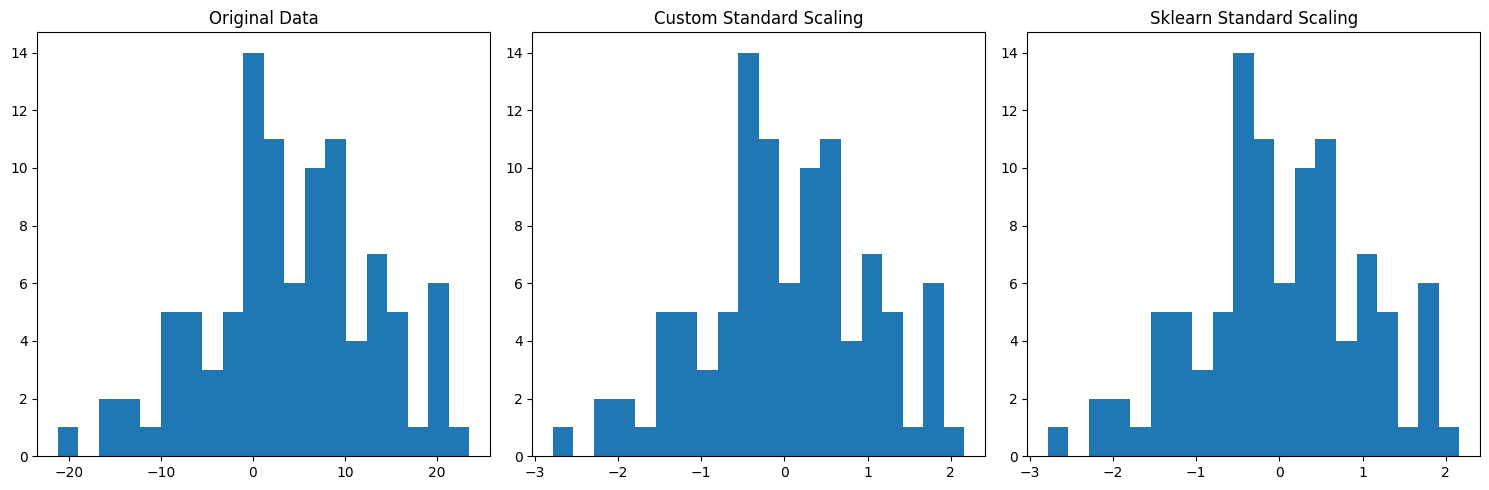

Custom implementation mean: -3.1086244689504386e-17
Custom implementation std: 0.9999999999999999
Sklearn implementation mean: -3.1086244689504386e-17
Sklearn implementation std: 0.9999999999999999


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 1) * 10 + 5  # Mean = 5, Std = 10

# Custom implementation
def custom_standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_custom_scaled = custom_standard_scaler(X)

# Sklearn implementation
scaler = StandardScaler()
X_sklearn_scaled = scaler.fit_transform(X)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(X, bins=20)
plt.title("Original Data")

plt.subplot(132)
plt.hist(X_custom_scaled, bins=20)
plt.title("Custom Standard Scaling")

plt.subplot(133)
plt.hist(X_sklearn_scaled, bins=20)
plt.title("Sklearn Standard Scaling")

plt.tight_layout()
plt.show()

print("Custom implementation mean:", np.mean(X_custom_scaled))
print("Custom implementation std:", np.std(X_custom_scaled))
print("Sklearn implementation mean:", np.mean(X_sklearn_scaled))
print("Sklearn implementation std:", np.std(X_sklearn_scaled))



#### 1.2.2 Min-Max Scaling

Min-Max scaling transforms the data to a fixed range, typically [0, 1]. The formula is:

$$ x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

Where:
- $x_{scaled}$ is the normalized value
- $x$ is the original value
- $x_{min}$ is the minimum value of the feature
- $x_{max}$ is the maximum value of the feature

Let's implement Min-Max scaling:


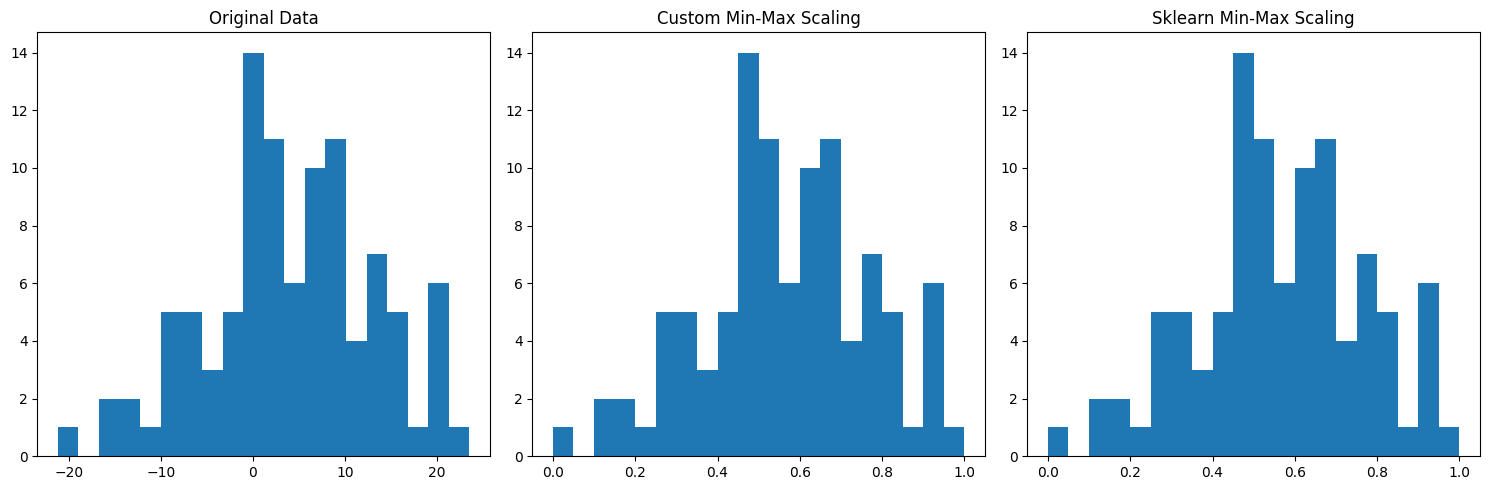

Custom implementation min: 0.0
Custom implementation max: 1.0
Sklearn implementation min: 0.0
Sklearn implementation max: 1.0


In [2]:
from sklearn.preprocessing import MinMaxScaler

def custom_minmax_scaler(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    return (X - min_val) / (max_val - min_val)

X_custom_minmax = custom_minmax_scaler(X)

scaler = MinMaxScaler()
X_sklearn_minmax = scaler.fit_transform(X)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(X, bins=20)
plt.title("Original Data")

plt.subplot(132)
plt.hist(X_custom_minmax, bins=20)
plt.title("Custom Min-Max Scaling")

plt.subplot(133)
plt.hist(X_sklearn_minmax, bins=20)
plt.title("Sklearn Min-Max Scaling")

plt.tight_layout()
plt.show()

print("Custom implementation min:", np.min(X_custom_minmax))
print("Custom implementation max:", np.max(X_custom_minmax))
print("Sklearn implementation min:", np.min(X_sklearn_minmax))
print("Sklearn implementation max:", np.max(X_sklearn_minmax))



#### 1.2.3 Impact of Normalization on Linear Regression

Note that standard Linear Regression is actually scale-invariant. This means that scaling the input features does not affect the model's predictive performance. The coefficients will change to compensate for the scaling, but the predictions will remain the same.

So why do we still recommend scaling for Linear Regression?

1. **Interpretation**: Scaled features allow for easier interpretation of coefficients, as they're on the same scale.
2. **Numerical Stability**: For very large or very small numbers, scaling can help avoid numerical instability in the calculations.
3. **Regularization**: If you're using regularized versions of linear regression (like Ridge or Lasso), scaling becomes important as these techniques are sensitive to the scale of the input features.
4. **Optimization**: For some optimization algorithms used in more complex models, scaling can lead to faster convergence.

Let's demonstrate this with a simple example:


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 2)
X[:, 1] = X[:, 1] * 1000  # Make the second feature much larger
y = 2 + 3 * X[:, 0] + 0.005 * X[:, 1] + np.random.randn(100) * 0.1

# Without scaling
model_raw = LinearRegression().fit(X, y)
y_pred_raw = model_raw.predict(X)

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_scaled = LinearRegression().fit(X_scaled, y)
y_pred_scaled = model_scaled.predict(X_scaled)

print("Raw coefficients:", model_raw.coef_)
print("Scaled coefficients:", model_scaled.coef_)
print("Are predictions equal?", np.allclose(y_pred_raw, y_pred_scaled))
print("MAE difference:", np.mean(np.abs(y_pred_raw - y_pred_scaled)))

Raw coefficients: [3.03386668 0.00503549]
Scaled coefficients: [0.92216961 1.42997385]
Are predictions equal? True
MAE difference: 1.2789769243681803e-15


#### 1.2.4 Log Scaling Exponential Data

When dealing with exponentially distributed data, log transformation can significantly improve the performance of linear regression models. This is because log transformation can help linearize exponential relationships.

Let's start by generating some exponentially distributed data:



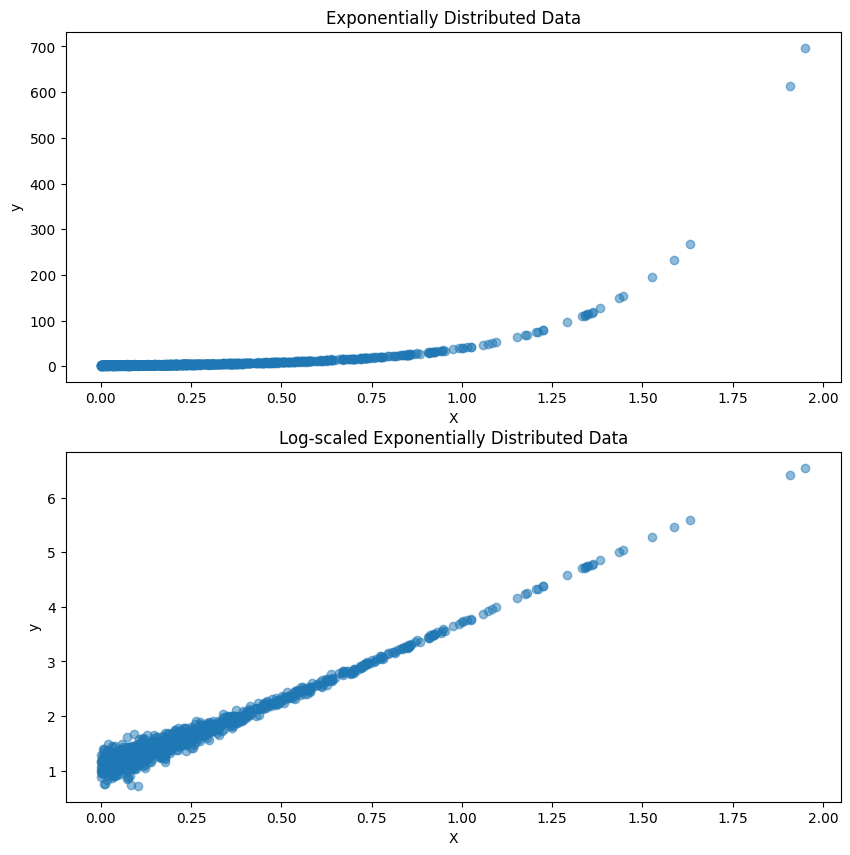

In [47]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Generate exponential data
np.random.seed(2)
X = np.random.exponential(scale=.3, size=(1000, 1))
y = 2 * np.exp(3 * X) + np.random.normal(0, 0.5, (1000, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 10))

# Plot the data
plt.subplot(211)
plt.scatter(X, y, alpha=0.5)
plt.title("Exponentially Distributed Data")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(212)
plt.scatter(X, np.log1p(y), alpha=0.5)
plt.title("Log-scaled Exponentially Distributed Data")
plt.xlabel("X")
plt.ylabel("y")

plt.show()

First, let's see how a standard linear regression performs on this data:

MSE without log transformation: 1794.252579777305


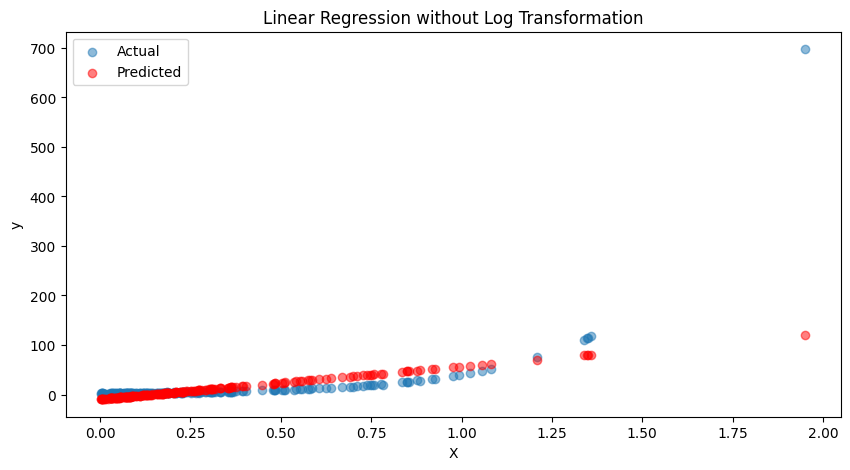

In [23]:
# Fit linear regression without transformation
model_raw = LinearRegression().fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)

mse_raw = mean_squared_error(y_test, y_pred_raw)
print(f"MSE without log transformation: {mse_raw}")

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_raw, color='red', alpha=0.5, label="Predicted")
plt.title("Linear Regression without Log Transformation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Now, let's apply log transformation manually:

MSE with manual log transformation: 1.9837560813859871


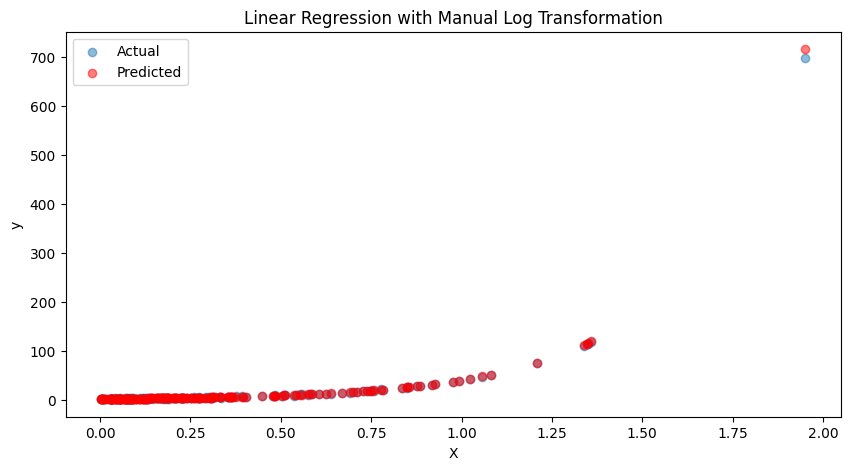

In [27]:
# Apply log transformation manually
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Fit linear regression on log-transformed data
model_log = LinearRegression().fit(X_train, y_train_log)
y_pred_log = model_log.predict(X_test)

# Transform predictions back to original scale
y_pred_exp = np.exp(y_pred_log)

mse_log = mean_squared_error(y_test, y_pred_exp)
print(f"MSE with manual log transformation: {mse_log}")

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_exp, color='red', alpha=0.5, label="Predicted")
plt.title("Linear Regression with Manual Log Transformation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Note that above, we had to remember to transform the data back into the original scale using `np.exp`.  Using an sklearn `FunctionTransformer` allows us to avoid that. However, because a pipeline is designed to work only with features (not the target) we'll need to use a `TransformedTargetRegressor` here.

MSE with sklearn log transformation: 1.9837560813859871


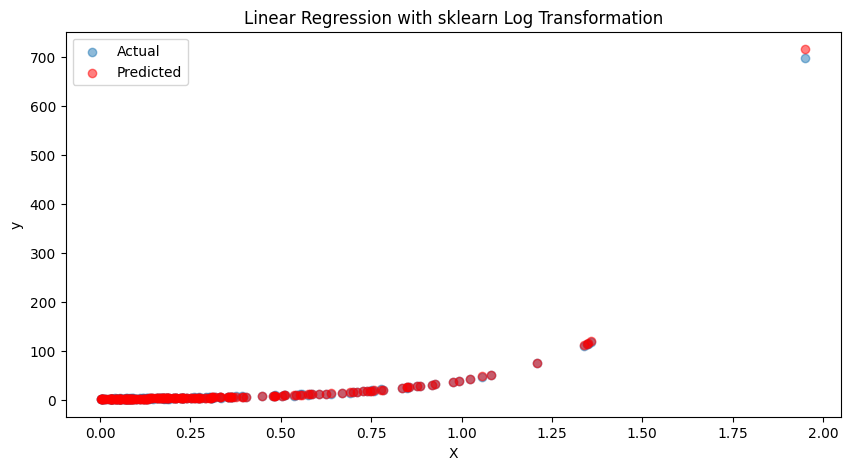

In [29]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

# Create log transformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

# Fit linear regression with log transformation
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
model_log = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log,
    inverse_func=np.exp
)

model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_log)
print(f"MSE with sklearn log transformation: {mse_sklearn}")

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred_log, color='red', alpha=0.5, label="Predicted")
plt.title("Linear Regression with sklearn Log Transformation")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## 2. Handling Outliers

Outliers are data points that are significantly different from other observations. They can have a disproportionate effect on the regression line, potentially leading to poor model performance.

### 2.1 Detecting Outliers

There are several methods to detect outliers:



1. **Z-score method**: Points with a z-score above a certain threshold (e.g., 3 or -3) are considered outliers.
2. **Interquartile Range (IQR) method**: Points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers.
3. **Visual methods**: Box plots, scatter plots, etc.

Let's implement the IQR method:


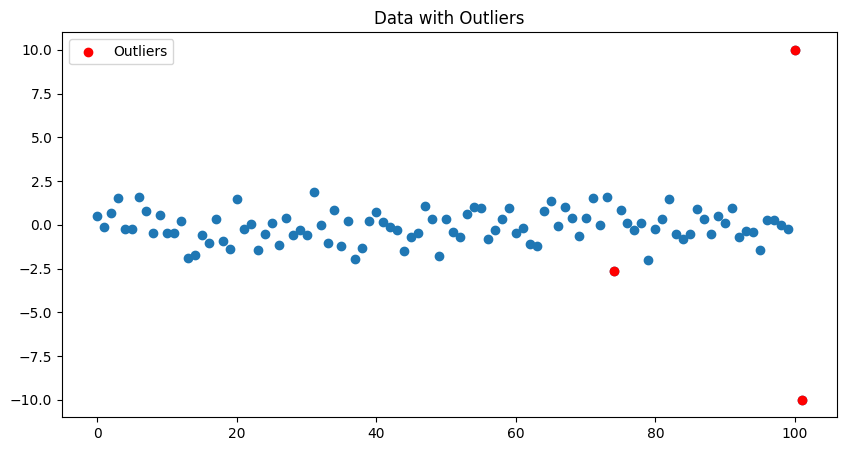

In [33]:

def detect_outliers_iqr(X):
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((X < lower_bound) | (X > upper_bound))
    return outliers

# Generate sample data with outliers
np.random.seed(42)
X = np.random.randn(100, 1)
X = np.vstack([X, [10], [-10]])  # Add outliers

outliers = detect_outliers_iqr(X)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(X)), X)
plt.scatter(outliers[0], X[outliers], color='red', label='Outliers')
plt.title("Data with Outliers")
plt.legend()
plt.show()



### 2.2 Handling Outliers

There are several manual strategies for handling outliers:

1. **Removal**: Simply remove the outliers from the dataset.
2. **Transformation**: Apply a transformation (e.g., log transformation) to reduce the impact of outliers.
3. **Winsorization**: Cap the outlier values at a specified percentile.

Let's implement and compare these methods:


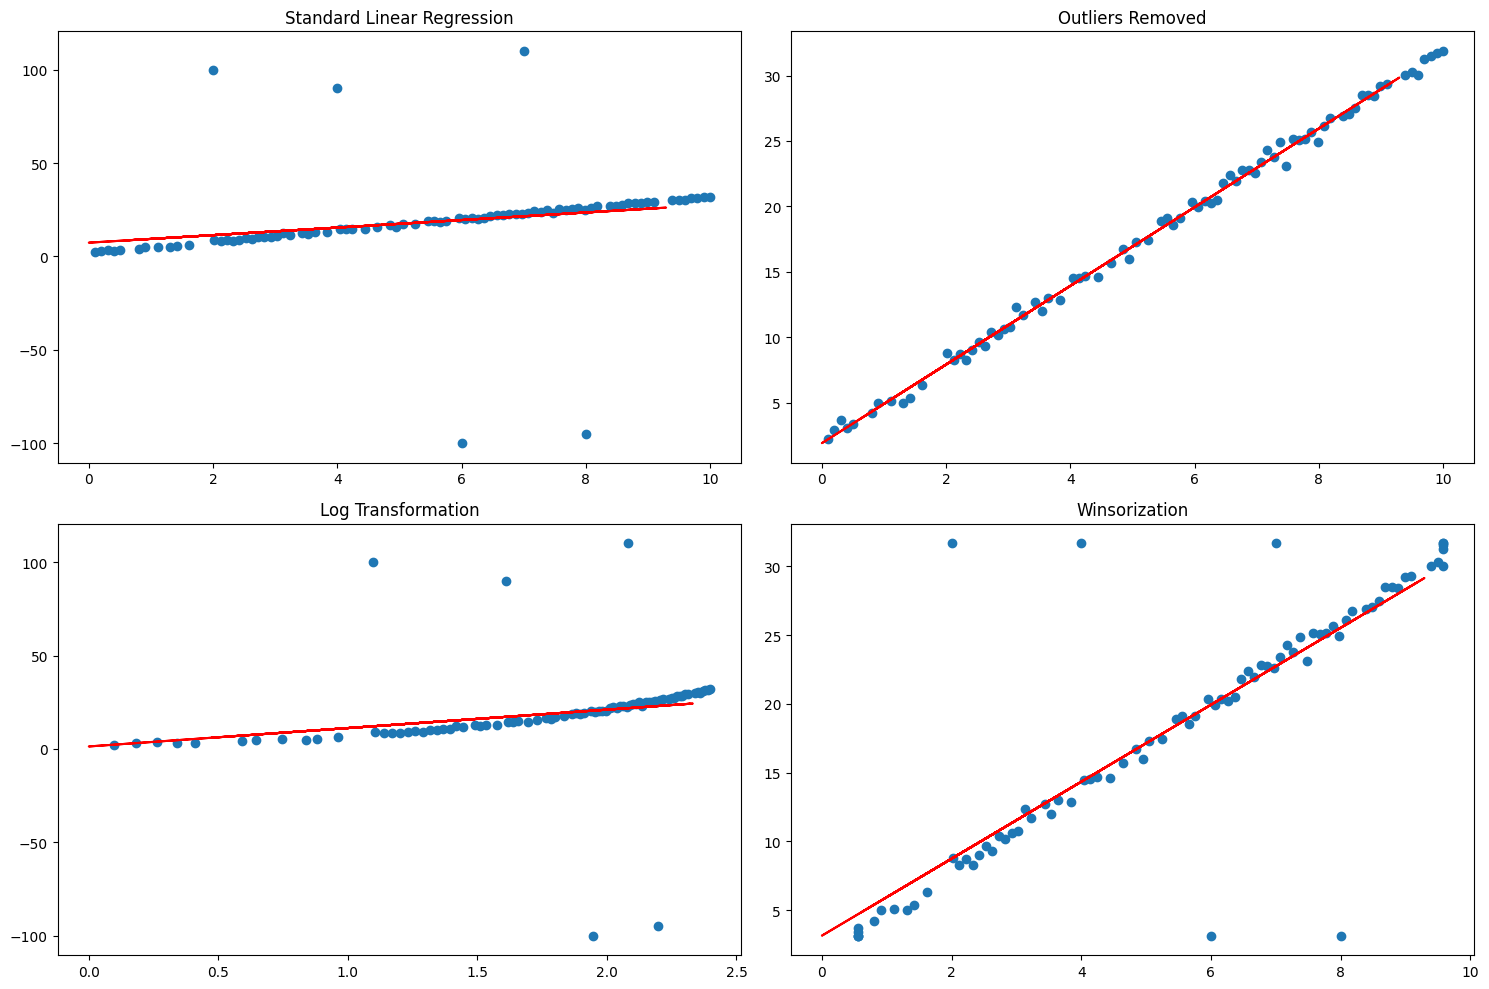

MSE Standard: 406.59368451508703
MSE Clean: 375.97259706283626
MSE Log: 421.66057552681946
MSE Winsorized: 381.58133816636166


In [49]:

# Generate sample data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 + 3 * X + np.random.randn(100, 1) * 0.5

outlier_X = np.array([[2], [3], [4], [6], [7], [8]])
outlier_y = np.array([[100], [-80], [90], [-100], [110], [-95]])

X = np.vstack([X, outlier_X])
y = np.vstack([y, outlier_y])

# Shuffle the data
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Standard Linear Regression
model_standard = LinearRegression().fit(X_train, y_train)
y_pred_standard = model_standard.predict(X_test)

# 2. Remove outliers
outliers = detect_outliers_iqr(y_train)
X_train_clean = np.delete(X_train, outliers[0], axis=0)
y_train_clean = np.delete(y_train, outliers[0], axis=0)
model_clean = LinearRegression().fit(X_train_clean, y_train_clean)
y_pred_clean = model_clean.predict(X_test)

# 3. Log transformation
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)
model_log = LinearRegression().fit(X_train_log, y_train)
y_pred_log = model_log.predict(X_test_log)

# 4. Winsorization
def winsorize(X, limits):
    return np.clip(X, np.percentile(X, limits[0]), np.percentile(X, limits[1]))

X_train_win = winsorize(X_train, (5, 95))
y_train_win = winsorize(y_train, (5, 95))
model_win = LinearRegression().fit(X_train_win, y_train_win)
y_pred_win = model_win.predict(X_test)



# Plot results
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred_standard, color='red')
plt.title("Standard Linear Regression")

plt.subplot(222)
plt.scatter(X_train_clean, y_train_clean)
plt.plot(X_test, y_pred_clean, color='red')
plt.title("Outliers Removed")

plt.subplot(223)
plt.scatter(X_train_log, y_train)
plt.plot(X_test_log, y_pred_log, color='red')
plt.title("Log Transformation")

plt.subplot(224)
plt.scatter(X_train_win, y_train_win)
plt.plot(X_test, y_pred_win, color='red')
plt.title("Winsorization")



plt.tight_layout()
plt.show()

# Compare MSE
print("MSE Standard:", mean_squared_error(y_test, y_pred_standard))
print("MSE Clean:", mean_squared_error(y_test, y_pred_clean))
print("MSE Log:", mean_squared_error(y_test, y_pred_log))
print("MSE Winsorized:", mean_squared_error(y_test, y_pred_win))


## 4. Removing Outliers with Sklearn Methods

Sklearn provides some powerful tools for detecting and removing outliers. We'll explore two of these methods: RobustScaler and IsolationForest.

### 4.1 Using RobustScaler

RobustScaler uses statistics that are robust to outliers. It scales features using the Interquartile Range (IQR). We can use it to identify outliers based on scaled values.

Note in the following example, our outliers are in the target (y) values.  So, to remove these we need to make sure we're processing both X and y.


Original data shape: (106, 1)
Data shape after removing outliers: (100, 1)


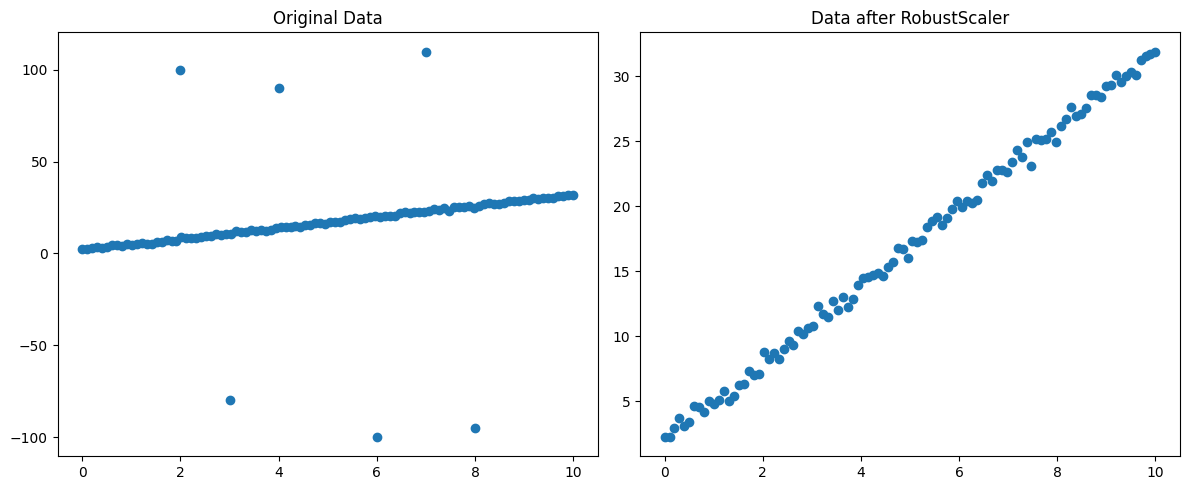

MSE with RobustScaler outlier removal: 376.0686463558877


In [50]:

from sklearn.preprocessing import RobustScaler


def remove_outliers_robust_scaler(X, y, threshold=3):
    # Combine X and y for joint scaling
    Xy = np.hstack([X, y])
    
    scaler = RobustScaler()
    Xy_scaled = scaler.fit_transform(Xy)
    
    # Identify outliers based on scaled values
    mask = np.all(np.abs(Xy_scaled) < threshold, axis=1)
    
    return X[mask], y[mask]

X_robust, y_robust = remove_outliers_robust_scaler(X, y)

print(f"Original data shape: {X.shape}")
print(f"Data shape after removing outliers: {X_robust.shape}")

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, y)
plt.title("Original Data")
plt.subplot(122)
plt.scatter(X_robust, y_robust)
plt.title("Data after RobustScaler")
plt.tight_layout()
plt.show()

# Fit and evaluate linear regression
model_robust = LinearRegression().fit(X_robust, y_robust)
y_pred_robust = model_robust.predict(X_test)
mse_robust = mean_squared_error(y_test, y_pred_robust)
print(f"MSE with RobustScaler outlier removal: {mse_robust}")

### 4.2 Using IsolationForest

IsolationForest is an unsupervised learning algorithm for anomaly detection. It isolates anomalies by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Original data shape: (106, 1)
Data shape after removing outliers: (95, 1)


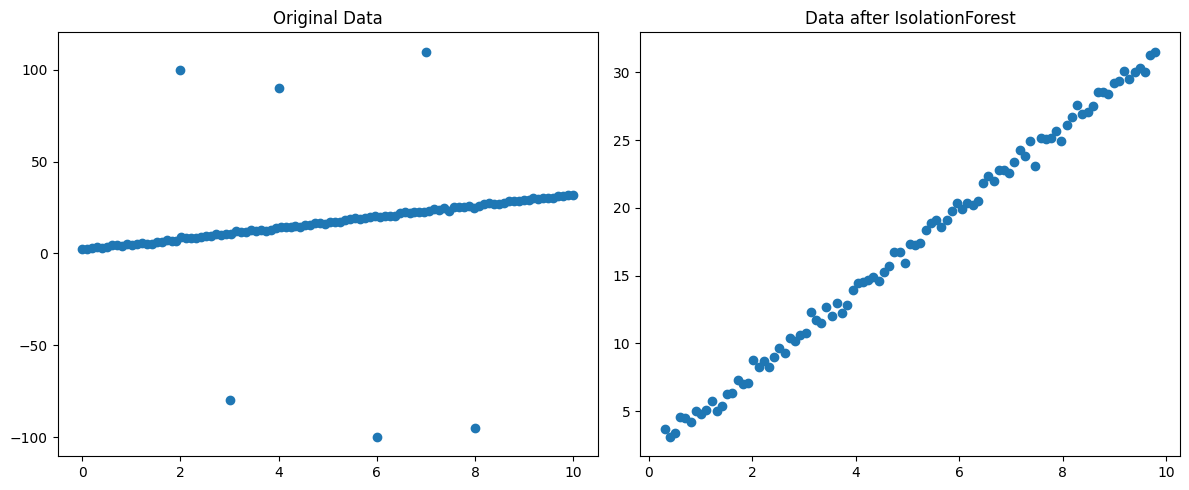

MSE with IsolationForest outlier removal: 375.9136463882688


In [51]:
from sklearn.ensemble import IsolationForest

def remove_outliers_isolation_forest(X, y, contamination=0.1):
    # Combine X and y for joint outlier detection
    Xy = np.hstack([X, y])
    
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    yhat = iso_forest.fit_predict(Xy)
    
    # Identify non-outliers
    mask = yhat != -1
    
    return X[mask], y[mask]

X_iforest, y_iforest = remove_outliers_isolation_forest(X, y)

print(f"Original data shape: {X.shape}")
print(f"Data shape after removing outliers: {X_iforest.shape}")

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, y)
plt.title("Original Data")
plt.subplot(122)
plt.scatter(X_iforest, y_iforest)
plt.title("Data after IsolationForest")
plt.tight_layout()
plt.show()

# Fit and evaluate linear regression
model_iforest = LinearRegression().fit(X_iforest, y_iforest)
y_pred_iforest = model_iforest.predict(X_test)
mse_iforest = mean_squared_error(y_test, y_pred_iforest)
print(f"MSE with IsolationForest outlier removal: {mse_iforest}")

Beware, however, of applying these methods without first understanding your data!  For example, if we reconsider our exponentially distributed data from before, you'll find our IsoForest prunes data values:

Original data shape: (1000, 1)
Data shape after removing outliers: (900, 1)


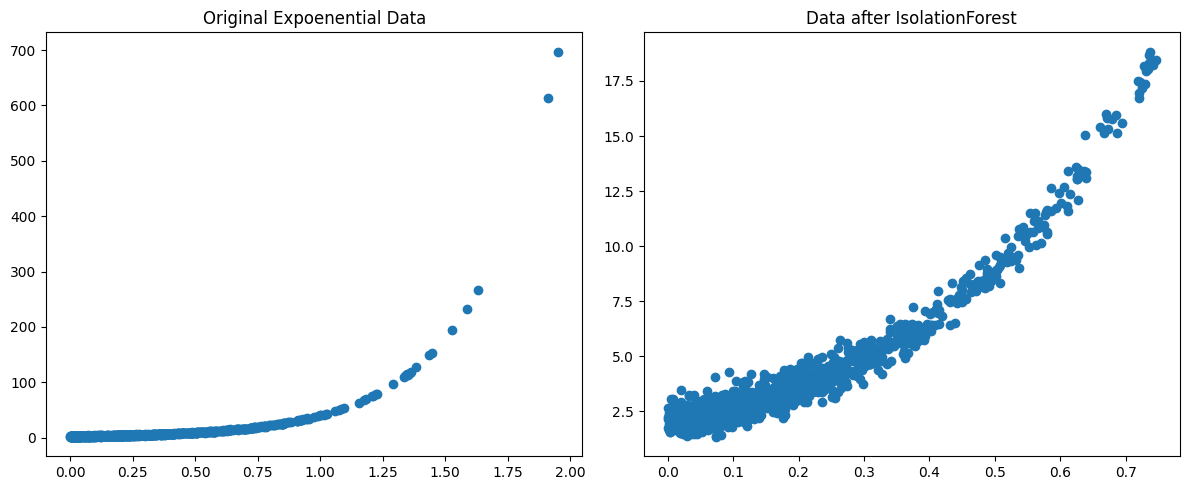

In [52]:
np.random.seed(2)
X = np.random.exponential(scale=.3, size=(1000, 1))
y = 2 * np.exp(3 * X) + np.random.normal(0, 0.5, (1000, 1))

X_iforest, y_iforest = remove_outliers_isolation_forest(X, y)

print(f"Original data shape: {X.shape}")
print(f"Data shape after removing outliers: {X_iforest.shape}")

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, y)
plt.title("Original Expoenential Data")
plt.subplot(122)
plt.scatter(X_iforest, y_iforest)
plt.title("Data after IsolationForest")
plt.tight_layout()
plt.show()




## Conclusion

In this notebook, we've explored the importance of normalization and handling outliers in the context of linear regression. We've seen how these preprocessing techniques can significantly impact model performance and interpretation. 

Key takeaways:
1. Normalization and scaling ensure that all features contribute equally to the model's learning process.
2. Outliers can disproportionately affect the regression line and lead to poor model performance.
3. There are multiple strategies for handling outliers, and the best approach may depend on the specific dataset and problem.

In practice, it's important to examine your data carefully before selecting the preprocessing steps you choose to apply.